# Causes Behind Homicides 


For this project I wanted to tackle the problem of the [United States elevated Homicide Rate](https://www.statista.com/statistics/1374211/g7-country-homicide-rate/) compared to other highly developed nations. Much of the consideration around this topic resolves around Poverty, Gun Ownership, and Mental Health. Specifically, I wanted to look at the these different metrics at a county level using Census and CDC datasources; In the following notebook consildated data and perform some column creation and basic EDA, a important precursor to Model Creation. I hope you find this project informative and interesting. 

My DataSources are dervied from these link: 

Population Density (2020): 
https://covid19.census.gov/datasets/21843f238cbb46b08615fc53e19e0daf_1/explore?location=18.286026%2C0.315550%2C2.18&showTable=true

Suicides, Homicides, and Drug and Alcohol Related Death(2010-2020): https://wonder.cdc.gov/controller/datarequest/

Income & Poverty (2022): https://www.census.gov/programs-surveys/saipe.html

Before diving into the data in order to protect the privacy counties, the CDC will supress data if the count is low enough to track the cause of death back to the deceased. These are some consideration I had to take tackle when working on this project. I will walk through the data cleaning process and finally the model construction step by step over three notebooks. 

First lets import some of the libraries we will be using. 

## Part 2: EDA

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First let's import the consolidated from the last notebook (see Part 1: Data Cleaning). The pandas describe function will give a quick summary of the data columns. We can see that most of the column are not being brought in as numeric. For the CDC columns, this is due to the 'Suppressed' values. For 'Poverty' column this is due Kalawoa County, which has unreported data due to its unique political structure. I have decided to drop that row. Then we will convert those in Numeric columns. For the CDC data I have decided to replace 'Suppressed' to Nan, which will allow us to treat the column as a float. In the next notebook we will expiriment with imputting values.

In [22]:
df = pd.read_csv('data/Homicide_Study_data.csv')
df.describe(include = 'all')

,County,State,Pop. Den.,Poverty (%),Poverty (%) U18,Drugs,Alcohol,Firearms,All,Homicides,Population
count,1810,1810,1810.000000,1810,1810,1810,1810,1810,1810,1810.000000,1.810000e+03
unique,1810,51,NaN,275,365,635,482,384,570,NaN,NaN
top,"Autauga County, AL",TX,NaN,9.8,14.6,Suppressed,Suppressed,Suppressed,Suppressed,NaN,NaN
freq,1,130,NaN,27,14,73,110,85,73,NaN,NaN
mean,NaN,NaN,166.200682,NaN,NaN,NaN,NaN,NaN,NaN,107.744199,1.819596e+06
std,NaN,NaN,906.903687,NaN,NaN,NaN,NaN,NaN,NaN,364.006073,4.604567e+06
min,NaN,NaN,0.014362,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.750000e+02
25%,NaN,NaN,14.565541,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,2.815815e+05
50%,NaN,NaN,32.320996,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,5.906360e+05
75%,NaN,NaN,94.062112,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,1.549939e+06


In [23]:
display(df.iloc[403])
df = df.drop(df.index[403])

County             Kalawao County, HI
State                              HI
Pop. Den.                    2.414868
Poverty (%)                         .
Poverty (%) U18                     .
Drugs                               0
Alcohol                             0
Firearms                            0
All                                 0
Homicides                           0
Population                        975
Name: 403, dtype: object

In [24]:
df['Poverty (%)'] = pd.to_numeric(df['Poverty (%)'])
df['Poverty (%) U18'] = pd.to_numeric(df['Poverty (%) U18'])

In [25]:
df = df.replace(to_replace = 'Suppressed', value=np.nan)

In [26]:
df.loc[:, ['All','Firearms','Drugs','Alcohol']] = df[['All','Firearms','Drugs','Alcohol']].apply(pd.to_numeric)

/var/folders/22/y6hct7tn5p33zlwqnbg2q90h0000gp/T/ipykernel_15507/763372090.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, ['All','Firearms','Drugs','Alcohol']] = df[['All','Firearms','Drugs','Alcohol']].apply(pd.to_numeric)


In [27]:
df.describe()

,Pop. Den.,Poverty (%),Poverty (%) U18,Drugs,Alcohol,Firearms,All,Homicides,Population
count,1809.000000,1809.000000,1809.000000,1736.000000,1699.000000,1724.000000,1736.000000,1809.000000,1.809000e+03
mean,166.291221,15.003648,19.776064,362.083525,202.004709,127.475638,253.507488,107.803759,1.820601e+06
std,907.146273,5.755975,8.456950,801.474122,520.656114,227.242303,500.829283,364.097903,4.605642e+06
min,0.014362,3.100000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.289000e+03
25%,14.604056,10.800000,13.500000,49.750000,32.000000,34.000000,53.000000,14.000000,2.819700e+05
50%,32.351111,14.300000,18.800000,116.000000,69.000000,65.000000,110.000000,26.000000,5.907970e+05
75%,94.193830,18.300000,24.900000,307.500000,170.000000,129.000000,249.000000,66.000000,1.552790e+06
max,27819.804800,42.300000,61.200000,10848.000000,13547.000000,4164.000000,9172.000000,7374.000000,1.103636e+08


Now that our data is in the correct format we can proceed to create the variables that we will use for modeling. First, we would want to find the Homicide rate (per 100000).  

<Axes: >

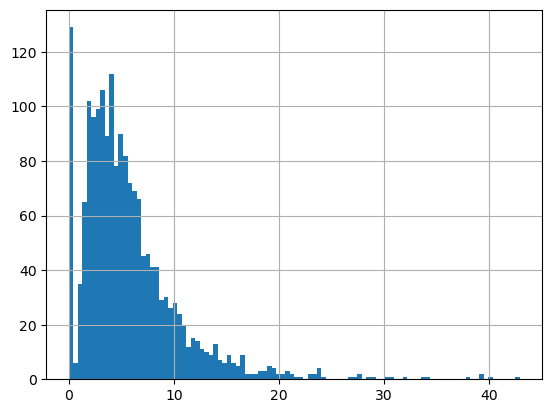

In [28]:
df['Homicide_Rate'] = (df['Homicides']/df['Population'])*100000 #per 100000
df['Homicide_Rate'].hist(bins = 100)

When we look at the distrubution of the column that we create we can see the data is right skewed. Ideally, we would want to be close to a normal distribution (or Bell Curve) during our modeling step. We can make this transformation and observe the new Histogram. 

Note: we use log1p (log + 1) to manage our rows that are equal to 0.

<Axes: >

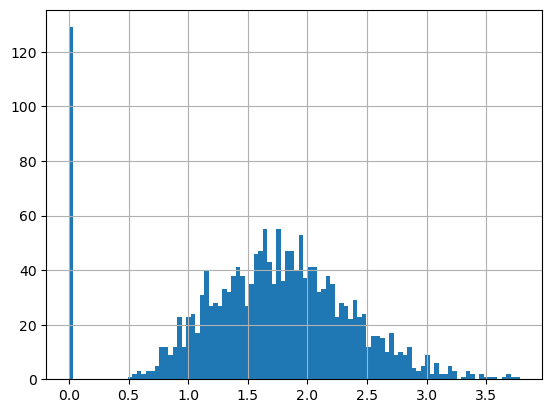

In [29]:
np.log1p(df['Homicide_Rate']).hist(bins = 100)

That looks better, although we still have a large number of outliers from the no homicide counties. Next we can look at the Firearms Ownership rate. While this likely isn't a exact approximation of the actual Ownership rate in the county, it is a well known proxy for gun ownership. While this is not a perfect normal distrubution, it is close enough were we should feel comfortable using it in our model. Next, we will find calculate our population adjusted Drugs and Alcohol Deaths. This is also close enough to a normal distribution. 

<Axes: >

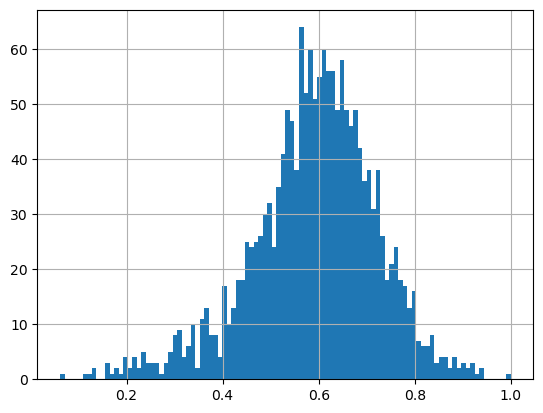

In [30]:
df['Y_Homicides'] = np.log1p(df['Homicide_Rate'])
df['X_Firearms'] = df['Firearms']/ df['All']
df['X_Firearms'].hist(bins = 100)

<Axes: >

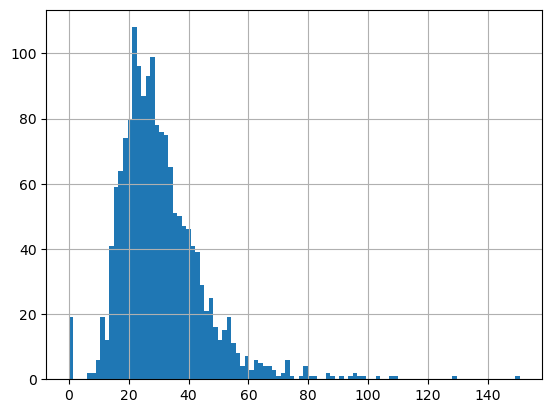

In [31]:
df['X_DA'] = ((df['Drugs'] + df['Alcohol'])/df['Population'])*100000
df['X_DA'].hist(bins = 100)

<Axes: >

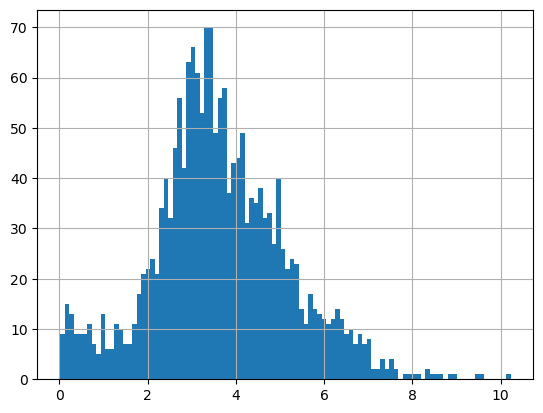

In [32]:
df['X_PopDen'] = np.log1p(df['Pop. Den.'])
df['X_PopDen'].hist(bins = 100)

<Axes: >

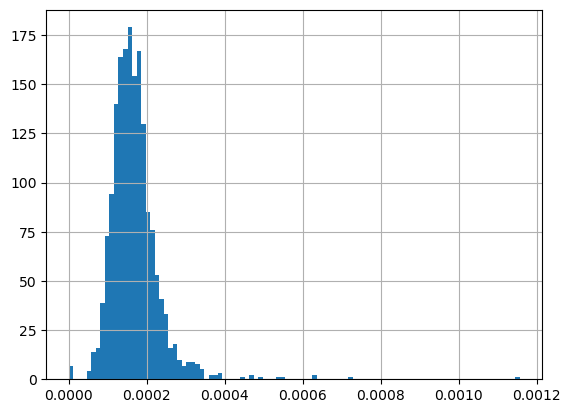

In [34]:
df['X_Suicide']= df['All']/df['Population']
df['X_Suicide'].hist(bins = 100)

As you can see above, we also brought in log adjusted Population Density, as well as Suicide (adjusted by population) which can serve as a another potential stand in for mental health. Next, to get a general sense, we should do a coorelation coefficient of our variables. 

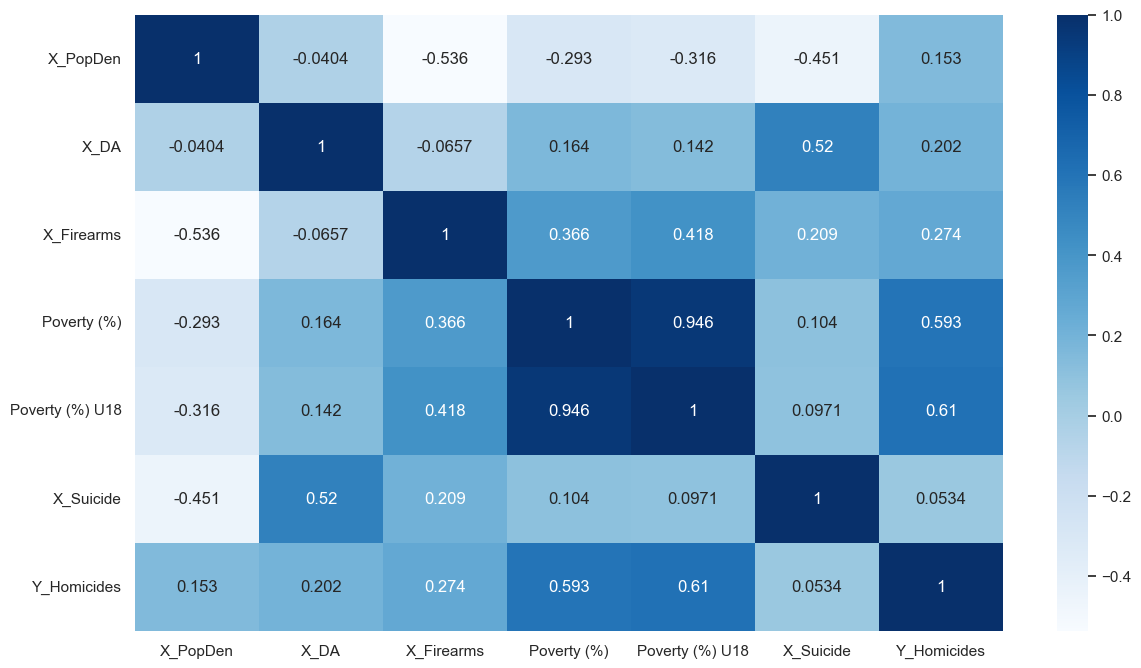

In [35]:
df.head()
df_corr = df[['X_PopDen','X_DA','X_Firearms','Poverty (%)', 'Poverty (%) U18', 'X_Suicide','Y_Homicides']]

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_corr.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3g')

Here we can see the coorelation coefficent of the variables we generated, and there are sime interesting insights we can immediatly grab. One, we can see that there is a high coorelation between Poverty (%) and Homicides, both U18 and for all ages. Also interesting, we see a .202 and .0534 between Homicides and DA deaths and Suicides respectivly. This indicates that there may be some relation between violent crime and homicides although these valuesa are both below Firearms rate. While these insights are interesting, there is also a high level colinearity between some of the variables, so we will continue to our modeling phase to untangle the variables and distill the primary correlation with homicides. 

In [37]:
df = df.rename(columns = {'Poverty (%)' : 'X_Poverty'})
df[['County','State','Population','X_Firearms','X_DA','X_PopDen','X_Poverty','X_Suicide','Y_Homicides']].to_csv('data/Modeling_Data.csv', index = False)